In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Text(0.5, 0.98, 'Total Product')

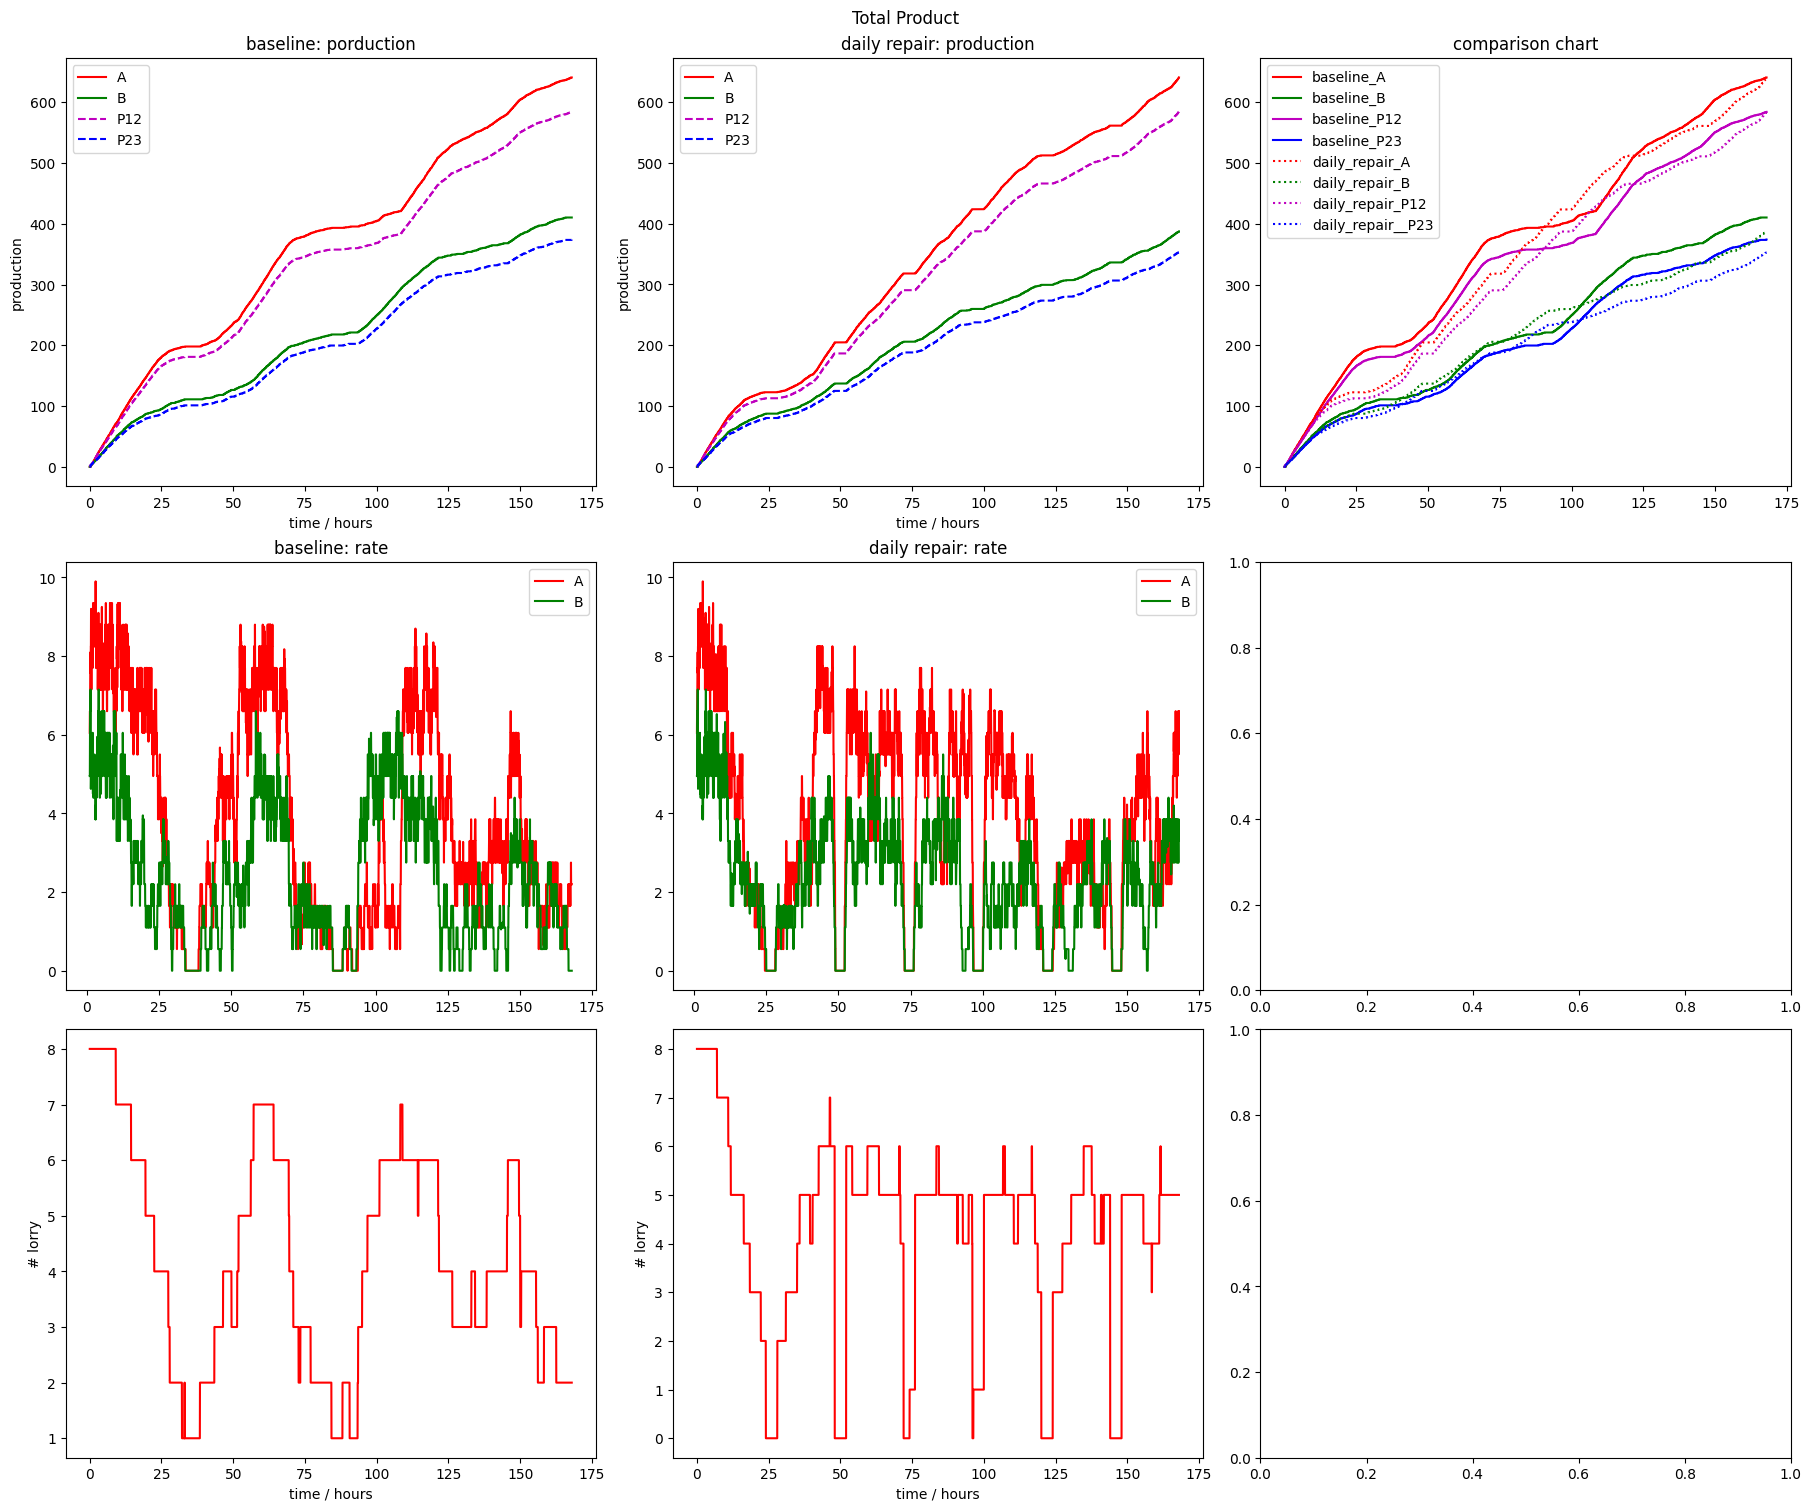

In [18]:
baseline = pd.read_csv('result/8lorry_capacity-0.5/baseline/result.csv')
daily = pd.read_csv('result/8lorry_capacity-0.5/repair/result.csv')
# daily = pd.read_csv('result.csv')
plt_result = [baseline,daily]
result_name = ['baseline: porduction','daily repair: production']

average_periods = 60
baseline_rate = baseline.diff(periods=average_periods)
daily_rate = daily.diff(periods=average_periods)
plt_rate = [baseline_rate, daily_rate]
rate_name = ['baseline: rate','daily repair: rate']

fig, axs = plt.subplots(3,3, figsize=(18,15), constrained_layout=True)
for ax, tmp_plt, tmp_name in zip(axs[0,0:2].flatten(),plt_result,result_name):
    ax.plot(tmp_plt['time'].values, tmp_plt['A'].values,'r-', label='A')
    ax.plot(tmp_plt['time'].values, tmp_plt['B'].values,'g-', label='B')
    ax.plot(tmp_plt['time'].values, tmp_plt['P12'].values,'m--', label='P12')
    ax.plot(tmp_plt['time'].values, tmp_plt['P23'].values,'b--', label='P23')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('production')
    # ax.set_ylim([0,1500])
    ax.set_title(tmp_name)
    ax.legend()
axs[0,2].plot(baseline['time'].values, baseline['A'].values,'r-', label='baseline_A')
axs[0,2].plot(baseline['time'].values, baseline['B'].values,'g-', label='baseline_B')
axs[0,2].plot(baseline['time'].values, baseline['P12'].values,'m-', label='baseline_P12')
axs[0,2].plot(baseline['time'].values, baseline['P23'].values,'b-', label='baseline_P23')

axs[0,2].plot(daily['time'].values, daily['A'].values,'r:', label='daily_repair_A')
axs[0,2].plot(daily['time'].values, daily['B'].values,'g:', label='daily_repair_B')
axs[0,2].plot(daily['time'].values, daily['P12'].values,'m:', label='daily_repair_P12')
axs[0,2].plot(daily['time'].values, daily['P23'].values,'b:', label='daily_repair__P23')
# axs[0,2].set_ylim([0,1500])
axs[0,2].set_title('comparison chart')
axs[0,2].legend()


for ax, tmp_plt, tmp_name, tmp_result in zip(axs[1,0:2].flatten(),plt_rate,rate_name, plt_result):
    ax.plot(tmp_result['time'].values, tmp_plt['A'].values,'r-', label='A')
    ax.plot(tmp_result['time'].values, tmp_plt['B'].values,'g-', label='B')
    ax.set_title(tmp_name)
    ax.legend()

for ax, tmp_plt in zip(axs[2,0:2].flatten(), plt_result):
    ax.plot(tmp_plt['time'].values, tmp_plt['current_lorry'].values, 'r-')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('# lorry')
    # ax.set_ylim([0,6])

fig.suptitle('Total Product')